# 1. Loading the data with root_pandas and making a plot with matplotlib

In this example, we load the $B^0 \to D^{*-} \pi^+ \pi^+ \pi^-$ data and make a nice plot of the $B^0$ invariant mass with `matplotlib`.

First some imports of stuff we need:

In [1]:
from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets

In [2]:
from root_pandas import read_root
file_list = []
for y in years:
    for m in magnets:
        file_list.append(f"{loc.DATA}/data_90000000_{y}_{m}.root")
tree_name = "DecayTree"
vars = ["B0_M"]
df = read_root(file_list, tree_name, columns=vars)

Welcome to JupyROOT 6.22/02


In [1]:
from root_pandas import read_root # read rootfiles
import matplotlib.pyplot as plt
from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets
import numpy as np

#Gives us nice LaTeX fonts in the plots
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)

Welcome to JupyROOT 6.22/02


Here we load the data for each year and magnet polarity into a `pandas` DataFrame. We specify the variable we want to look at (`B0_M`) - this list can be added to in order to load more variables. You can also run the `read_root` command without giving a `columns` argument, which will load all of the `ROOT` file branches.

In [2]:
file_list = []
for y in years:
    for m in magnets:
        file_list.append(f"{loc.DATA}/data_90000000_{y}_{m}.root")
tree_name = "DecayTree"
vars = ["B0_M"]
df = read_root(file_list, tree_name, columns=vars)

Here we have loaded the `TTree` called `DecayTree` from a collection of `ROOT` files, one for each year and magnet. Note that the years and magnets are specified in `bd2dst3pi/definitions.py`. Loading in this way is similar to `TChain` in `ROOT`.

We can calculate some properties of the `B0_M` variable, like the mean and standard deviation:

In [3]:
mu = df["B0_M"].mean()
sigma = df["B0_M"].std()
print(f"B0_M mu = {mu:.2f}, B0_M sigma = {sigma:.2f}")

B0_M mu = 5275.58, B0_M sigma = 27.74


We are using a nice feature in Python 3 called `f-strings` here when printing. This lets you put a variable directly into a string by doing `{var}`. We specify the number of decimals by doing `{var:2f}`, where `2` gives us two decimal places.

Now we can make a plot of the $B^0$ mass. One handy way to quickly check a distribution is by doing:

In [4]:
df["B0_M"]

0        5273.254972
1        5271.104059
2        5283.646468
3        5292.956452
4        5279.135346
            ...     
31546    5311.181225
31547    5213.654764
31548    5267.801819
31549    5298.730980
31550    5292.040438
Name: B0_M, Length: 31551, dtype: float64

In [1]:
bin_width = 4
low = df["B0_M"].min()
high = df["B0_M"].max()
n_bins = int((high - low)/bin_width)
plt.hist(df["B0_M"], range=(2000, 3000),  bins=n_bins)
plt.show()

NameError: name 'df' is not defined

To make a fancier plot, we can make a `numpy` histogram of the data and then plot it as an errorbar plot:

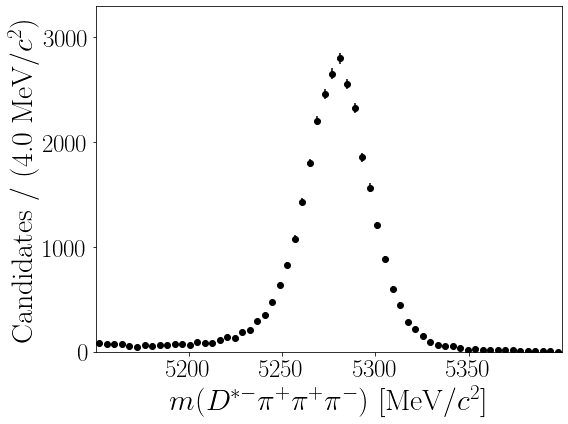

In [8]:
# Noob to pro :O


fig, ax = plt.subplots(figsize=(8,6))

#Make the histogram, and get the bin centres and error on the counts in each bin
counts, bin_edges = np.histogram(df["B0_M"], n_bins, range=(low,high))
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.sqrt(counts)

#Plot the bin centres and counts in each bin
plt.errorbar(bin_centres, counts, yerr=err, fmt='o', color='k')

#Some plot style stuff

#Units for the x-axis (B0_M is in MeV)
units = "MeV/$c^2$"

#Set the x title
plt.xlabel("$m(D^{*-}\pi^+\pi^+\pi^-)$ [%s]" % units,fontsize=30)

#Set the y-title, which is number of candidates per bin
plt.ylabel(f"Candidates / ({bin_width:.1f} {units})", fontsize=30)

#Set lower and upper range of the x-axis
plt.xlim(low,high)

#Get the default y-limits, then redefine the plot to start at 0 and give it a bit more space on top (with the 1.1x)
ymin, ymax = plt.ylim()
plt.ylim(0.,ymax*1.1)

#Set the font size of the axis numbers
ax.tick_params(axis='both', which='major', labelsize=25)

#Remove any space not needed around the plot
plt.tight_layout()

plt.show()

#Save the plot as a PDF document into our PLOTS folder (output/plots as defined in bd2dst3pi/locations.py)
fig.savefig(f"{loc.PLOTS}/B0_M_data.pdf")

The data we are working with already has selection cuts applied, so you can see that the peak is very clean. There is some background, and we will work to fit this distribution as part of the project to measure the normalisation mode yield.

**Follow-up tasks**

- Can you add more variables and make plots of those? Try to do this in a nice way using loops and Python dictionaries.

- Can you also load the Monte Carlo in a similar way and plot it?

- Can you plot the data and MC on the same plots? Try using the `density=True` option in your histograms in order to make normalised data and MC histograms. They will then have the same area, and can be compared directly. 

## Task 1 - Can you add more variables and make plots of those? Try to do this in a nice way using loops and Python dictionaries.

First, let's see what are the available variables.

In [9]:
one_file = f"{loc.DATA}/data_90000000_{years[0]}_{magnets[0]}.root"
tree_name = "DecayTree"

# 1 root file is so large that it is wise to use "chunksize" in order to open only a little part of it.
# After all, we only want to get the columns.
for df_one_file in read_root(one_file, tree_name,chunksize=10):
    #particles = []
    for variable in df_one_file.keys():
        condition = 'EW' not in variable and 'nc' not in variable and 'cc' not in variable 
        condition = condition and 'Hlt' not in variable and 'L0' not in variable
        condition = condition and 'isoPlus' not in variable
        
        if condition:
            print(variable)
    break

B0_ENDVERTEX_X
B0_ENDVERTEX_Y
B0_ENDVERTEX_Z
B0_ENDVERTEX_XERR
B0_ENDVERTEX_YERR
B0_ENDVERTEX_ZERR
B0_ENDVERTEX_CHI2
B0_ENDVERTEX_NDOF
B0_ENDVERTEX_COV_
B0_OWNPV_X
B0_OWNPV_Y
B0_OWNPV_Z
B0_OWNPV_XERR
B0_OWNPV_YERR
B0_OWNPV_ZERR
B0_OWNPV_CHI2
B0_OWNPV_NDOF
B0_OWNPV_COV_
B0_IP_OWNPV
B0_IPCHI2_OWNPV
B0_FD_OWNPV
B0_FDCHI2_OWNPV
B0_DIRA_OWNPV
B0_P
B0_PT
B0_PE
B0_PX
B0_PY
B0_PZ
B0_MM
B0_MMERR
B0_M
B0_ID
B0_TAU
B0_TAUERR
B0_TAUCHI2
B0_ETA
B0_BPVDIRA
B0_BPVVDR
B0_NDAUGS
B0_0.20_IT
B0_0.30_IT
B0_0.40_IT
B0_0.50_IT
Dst_ENDVERTEX_X
Dst_ENDVERTEX_Y
Dst_ENDVERTEX_Z
Dst_ENDVERTEX_XERR
Dst_ENDVERTEX_YERR
Dst_ENDVERTEX_ZERR
Dst_ENDVERTEX_CHI2
Dst_ENDVERTEX_NDOF
Dst_ENDVERTEX_COV_
Dst_OWNPV_X
Dst_OWNPV_Y
Dst_OWNPV_Z
Dst_OWNPV_XERR
Dst_OWNPV_YERR
Dst_OWNPV_ZERR
Dst_OWNPV_CHI2
Dst_OWNPV_NDOF
Dst_OWNPV_COV_
Dst_IP_OWNPV
Dst_IPCHI2_OWNPV
Dst_FD_OWNPV
Dst_FDCHI2_OWNPV
Dst_DIRA_OWNPV
Dst_ORIVX_X
Dst_ORIVX_Y
Dst_ORIVX_Z
Dst_ORIVX_XERR
Dst_ORIVX_YERR
Dst_ORIVX_ZERR
Dst_ORIVX_CHI2
Dst_ORIVX_NDOF
Dst_ORIVX_COV_


The reconstructed decay is:
$$B^0 \to D^{*-} \pi^+ \pi^+ \pi^-$$
The particle in the root files are:
- B0
- Dst
- Dst_pion
- D0
- D0_kaon
- D0_pion
- tau
- tau_pion1
- tau_pion2

Some interesting variables:
- P, PT, PX, PY, PZ
- MM, M
- OWNPV_CHI2, ENDVERTEX_CHI2, ORIVX_CHI2

We define the units of these variables via a python dictionnary

In [10]:
variables = {
    'P' : {
        'name': "p",
        'unit': "MeV/c"
    },
    'PT': 
    {
        'name': "$p_T$",
        'unit': "MeV/c"
    },
    'M': 
    {
        'name': "$m$",
        'unit': "MeV/$c^2$"
    },
}

particle_names = {
    'B0':'$D^{*-}\pi^+\pi^+\pi^-$',
    'Dst':'$D^*$',
    'tau':'$\pi^+ \pi^+ \pi^-$'
}

We define a function *plot_hist* to plot a histogram given:
- the particle
- the variable

The function is highly inspired by the python code written before

In [11]:
def plot_hist(df, particle,variable, type_data = 'data', n_bins = 100):
    """
    Plot the histogram of particle_variable, with number of bins = 100
    """
    fig, ax = plt.subplots(figsize=(8,6))
    full_name_var = f"{particle}_{variable}"
    # Compute the number of bins
    #bin_width = 4
        
    
    low = df[full_name_var].min()
    high = df[full_name_var].max()
    
    
    #Make the histogram, and get the bin centres and error on the counts in each bin
    counts, bin_edges = np.histogram(df[full_name_var], n_bins, range=(low,high))
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
    bin_width = bin_edges[1]-bin_edges[0]
    err = np.sqrt(counts)

    #Plot the bin centres and counts in each bin
    plt.errorbar(bin_centres, counts, yerr=err, fmt='o', color='k')

    #Some plot style stuff

    #Units for the x-axis (B0_M is in MeV)
    units_var = variables[variable]['unit']
    name_var = variables[variable]['name']
    name_particle = particle_names[particle]
    

    #Set the x title
    plt.xlabel("%s(%s) [%s]" %(name_var,name_particle,units_var),fontsize=30)

    #Set the y-title, which is number of candidates per bin
    plt.ylabel(f"Candidates / ({bin_width:.1f} {units_var})", fontsize=30)

    #Set lower and upper range of the x-axis
    plt.xlim(low,high)

    #Get the default y-limits, then redefine the plot to start at 0 and give it a bit more space on top (with the 1.1x)
    ymin, ymax = plt.ylim()
    plt.ylim(0.,ymax*1.1)

    #Set the font size of the axis numbers
    ax.tick_params(axis='both', which='major', labelsize=25)

    #Remove any space not needed around the plot
    plt.tight_layout()

    plt.show()

    #Save the plot as a PDF document into our PLOTS folder (output/plots as defined in bd2dst3pi/locations.py)
    fig.savefig(f"{loc.PLOTS}/{full_name_var}_{type_data}.pdf")


def get_vars(variables_to_plot):
    return [f"{particle}_{variable}" for particle,variable in variables_to_plot]

variables_to_plot = [("B0","M"),("B0","PT"),("tau","M"),("tau","PT")]
vars = get_vars(variables_to_plot)

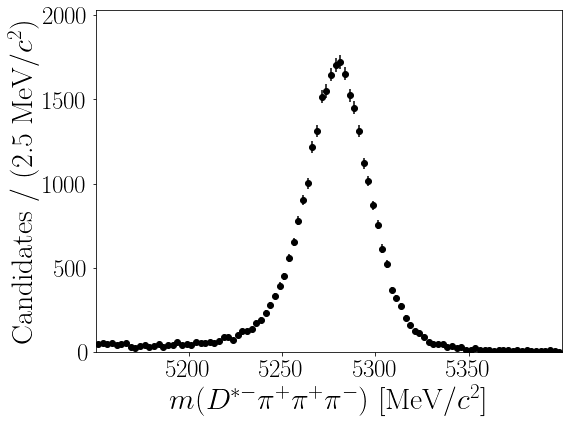

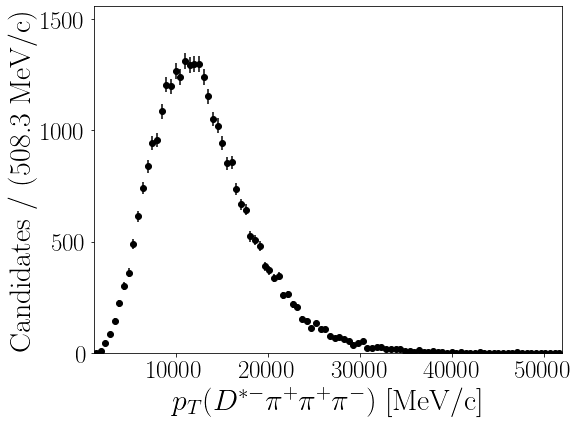

OSError: [Errno 27] File too large: '/afs/cern.ch/user/c/correian/.cache/matplotlib/tex.cache/75080d42a574f33255008b17f4ec11bd.tex'

OSError: [Errno 27] File too large: '/afs/cern.ch/user/c/correian/.cache/matplotlib/tex.cache/75080d42a574f33255008b17f4ec11bd.tex'

<Figure size 576x432 with 1 Axes>

In [12]:
file_list = []
for y in years:
    for m in magnets:
        file_list.append(f"{loc.DATA}/data_90000000_{y}_{m}.root")
tree_name = "DecayTree"

df = read_root(file_list, tree_name, columns=vars)

for particle,variable in variables_to_plot:
    plot_hist(df,particle,variable)

## Task 2 - Can you also load the Monte Carlo in a similar way and plot it?

Why not!
First a create function to load the data

In [13]:
def load_data(years,magnets,vars,type_data = 'data'):
    """
    type_data = 'MC' or 'data'
    """
    if type_data == 'MC':
        path = f"{loc.MC}/Bd_Dst3pi_11266018"
        ext = '_Sim09c-ReDecay01.root'
    elif type_data == 'data':
        path = f"{loc.DATA}/data_90000000"
        ext = '.root'
    elif type_data == 'MCc':
        path = f"{loc.MC}/Bd_Dst3pi_11266018"
        ext = '_Sim09c-ReDecay01.root'
    elif type_data == 'MCe':
        path = f"{loc.MC}/Bd_Dst3pi_11266018"
        ext = '_Sim09e-ReDecay01.root'
    else:
        print('Choose your side')
    
    file_list = []
    for y in years:
        for m in magnets:
            file_list.append(f"{path}_{y}_{m}{ext}")
    tree_name = "DecayTree"
    df = read_root(file_list, tree_name, columns=vars)
    return df

In [14]:
df_MC = load_data(years,magnets,vars,type_data = 'MC')

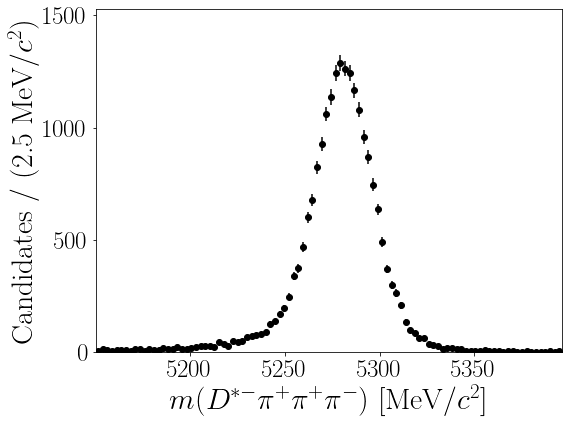

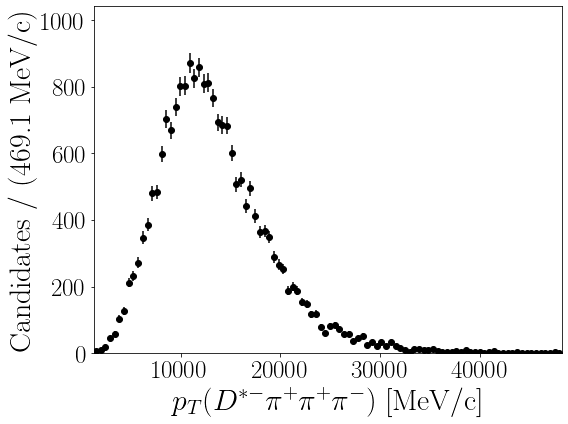

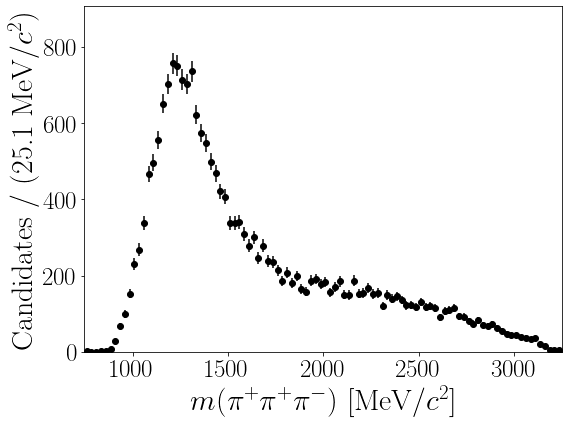

OSError: [Errno 27] File too large: '/afs/cern.ch/user/c/correian/.cache/matplotlib/tex.cache/5feeed32c45de819373f3abcc9bcf230.tex'

OSError: [Errno 27] File too large: '/afs/cern.ch/user/c/correian/.cache/matplotlib/tex.cache/5feeed32c45de819373f3abcc9bcf230.tex'

<Figure size 576x432 with 1 Axes>

In [15]:
for particle,variable in variables_to_plot:
    plot_hist(df_MC,particle,variable,type_data = 'MC')

## Task 3 - Can you plot the data and MC on the same plots? Try using the density=True option in your histograms in order to make normalised data and MC histograms. They will then have the same area, and can be compared directly. 

Let's improve a bit the function *plot_hist* defined before to plot several histograms.

In [16]:
def list_into_string(L):
    string = ""
    for l in L:
        string += str(l)
        string += '_'
    return string[:-1]
        
def plot_hist(dfs, particle,variable, n_bins = 100, mode_hist = False):
    """
    Plot the histogram of particle_variable, with number of bins = 100
    
    If df is a dictionnary:
    dfs={name_data:panda_dataframe,...}
    --> Plot several histograms in the same plot
    
    if mode_hist is on, I use histograms with density = True/False
    
    """
    
    density = len(dfs)>1 # if there are more than 2 histograms
    
    fig, ax = plt.subplots(figsize=(8,6))
    name_datas = list(dfs.keys())
    full_name_var = f"{particle}_{variable}"
    
    # Some features of the variable/particle
    units_var = variables[variable]['unit']
    name_var = variables[variable]['name']
    name_particle = particle_names[particle]
    
    
    # Compute the number of bins
    #bin_width = 4
    
    #First loop to determine the low and high value
    low = np.inf
    high = -np.inf
    for name_data, df in dfs.items():
        low = min(low,df[full_name_var].min())
        high = max(high,df[full_name_var].max())
    bin_width = (high-low)/n_bins
    
    colors = ['r','b','g','k']
    k_col = 0
    
    labels = []
    for name_data, df in dfs.items():
        n_candidates = len(df[full_name_var])
        label= f"{name_data}: {n_candidates} candidates" if density else None
        if mode_hist:
            alpha = 0.5 if density else 1            
            counts,_,_ = plt.hist(df[full_name_var], range = [low,high],bins = n_bins, alpha = alpha,
                                  label = label, density = density)
            
        else:
            #Make the histogram, and get the bin centres and error on the counts in each bin
            counts, bin_edges = np.histogram(df[full_name_var], n_bins, range=(low,high))
            n_candidates = counts.sum()
            bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
            n_candidates = counts.sum()
            #Plot the bin centres and counts in each bin
            err = np.sqrt(counts)
            if density:
                counts = counts/(n_candidates*bin_width)
                err = err/(n_candidates*bin_width)
            plt.errorbar(bin_centres, counts, yerr=err, fmt='o', color=colors[k_col], label = label)
        k_col += 1
              
    #Some plot style stuff
    #Set the x title
    plt.xlabel("%s(%s) [%s]" %(name_var,name_particle,units_var),fontsize=30)
    
    #Set the y-title, which is number of candidates per bin
    ylabel = "Proportion of candidates" if density else "Candidates"
    fontsize = 25 if density else 30
    plt.ylabel(f"{ylabel} / ({bin_width:.1f} {units_var})", fontsize=fontsize)

    #Set lower and upper range of the x-axis
    plt.xlim(low,high)
    
    #Get the default y-limits, then redefine the plot to start at 0 and give it a bit more space on top (with the 1.1x)
    ymin, ymax = plt.ylim()
    plt.ylim(0.,ymax*1.2)

    #Set the font size of the axis numbers
    ax.tick_params(axis='both', which='major', labelsize=25)

    #Legend
    plt.legend(fontsize = 20)
    
    #Remove any space not needed around the plot
    plt.tight_layout()

    plt.show()

    #Save the plot as a PDF document into our PLOTS folder (output/plots as defined in bd2dst3pi/locations.py)
    fig.savefig(f"{loc.PLOTS}/{full_name_var}_{list_into_string(name_datas)}.pdf")


In [17]:
variables_to_plot = [("B0","M"),("B0","PT"),("tau","M"),("tau","PT")]
vars = get_vars(variables_to_plot)

dfs = {
    'data':load_data(years,magnets,vars,type_data = 'data'),
    'MC': load_data(years,magnets,vars,type_data = 'MC')
}

for particle,variable in variables_to_plot:
    plot_hist(dfs, particle,variable, n_bins = 100)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


OSError: [Errno 27] File too large: '/afs/cern.ch/user/c/correian/.cache/matplotlib/tex.cache/7af1c76160dc6acd9445bcbeaa8b2db5.tex'

OSError: [Errno 27] File too large: '/afs/cern.ch/user/c/correian/.cache/matplotlib/tex.cache/7af1c76160dc6acd9445bcbeaa8b2db5.tex'

<Figure size 576x432 with 1 Axes>

In [ ]:
for particle,variable in variables_to_plot:
    plot_hist(dfs, particle,variable, n_bins = 100,mode_hist = True)

## Comparison of the the MC data

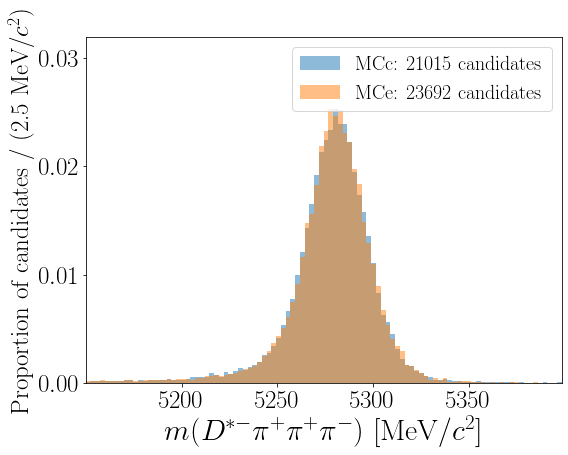

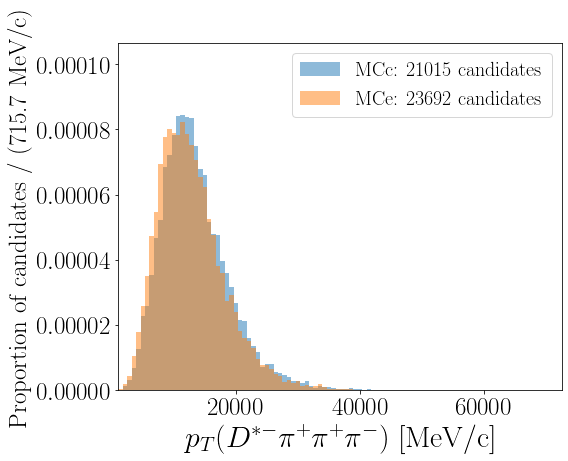

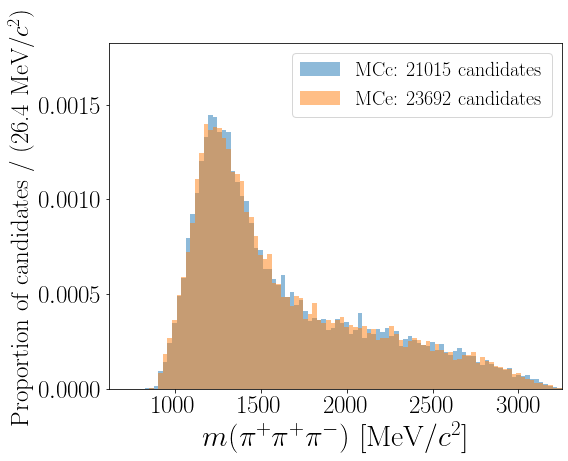

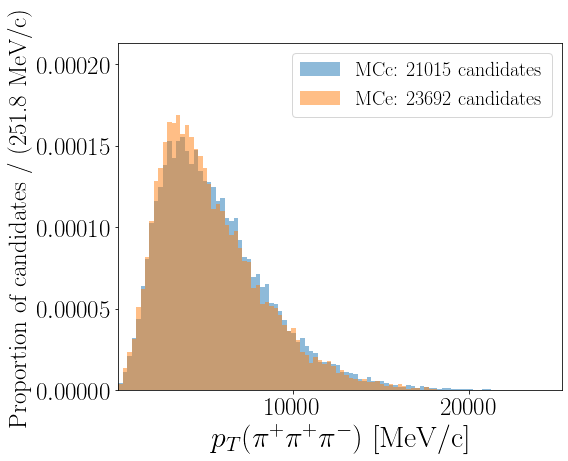

In [16]:
dfs = {
#     'data':load_data(years,magnets,vars,type_data = 'data'),
    'MCc': load_data(years,magnets,vars,type_data = 'MCc'),
    'MCe': load_data(years,magnets,vars,type_data = 'MCe')
}
for particle,variable in variables_to_plot:
    plot_hist(dfs, particle,variable, n_bins = 100,mode_hist = True)